In [1]:
%%capture
!pip install opendatasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re

from pathlib import Path
import zipfile
import os
import shutil

import opendatasets as od

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Flatten, LSTM
from keras.layers import Embedding
from keras import callbacks
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.core import Activation, Dropout, Dense
from keras.models import Model

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
class config:
  BASE_DIR = Path("/content/drive/MyDrive/DataColab Task")
  DATA_DIR = BASE_DIR / "data"
  MODEL_DIR = BASE_DIR / "models"

In [5]:
pd.set_option("display.max_colwidth", None)
df = pd.read_csv(config.DATA_DIR / "training.csv", index_col="Unnamed: 0")
df.head(2)

,body,topic,0d817400-3f5d-41e0-929c-c31fdbe75d31,39822b5f-e37e-43e8-b997-7142fe55c3ea,ca197b81-ca86-4792-8c25-2ba7cd4195b5,b49207eb-96eb-4b73-b534-adc0ef85022a,6fbf954a-03f9-4782-a65f-783271c9c447,9ff54ded-904b-4e0c-85ce-a3617f5cb913,74e2fab8-689f-4e17-9a1c-e1f92e084f55,9a06646a-e1df-4fca-888e-69658420556b,96326734-fd82-4350-b45c-513e7eb9147c,f5cdd7f2-9d4d-4ba5-9925-00c1701e30fa,e7cbe38d-c987-4113-aa94-fd77eda451d5,aa1edc37-1a01-414a-bcf7-8517e7c7053d,ebf2991e-4b7d-44c6-927b-a261a7b21d2c,a58b4b70-1b59-4240-917d-a2165a0ce2f0,83a09c6b-5f2f-421f-ae50-b38acca7e008
0,"hello and welcome to BBC News a woman who gave key evidence in the trial of Gillen Maxwell has spoken publicly today saying she hopes the guilty verdict will bring some solace to other survivors Annie Farmer, the only witness to use her real name during testimony said the case demonstrated that no one was above the law Maxwell was found guilty yesterday by a jury New York of grooming underage girls to be abused by her friend Jeffrey Epstein her lawyers say they'll appeal against the","['83a09c6b-5f2f-421f-ae50-b38acca7e008', '9ff54ded-904b-4e0c-85ce-a3617f5cb913']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,"news now out of North Hollywood. A 14 yearold girl was found dead inside a dressing room after police fired at a suspect. It happened at a Burlington store Thursday morning. Los Angeles police first responded to an assault call. Police shot at the suspect, who died. Behind him was a dressing room where the teen was hit by a bullet. The assault victim was injured and taken to a hospital today. A jury",['9ff54ded-904b-4e0c-85ce-a3617f5cb913'],0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [6]:
def preprocess_text(text):
    # Remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    # Removing multiple spaces
    text = re.sub(r'\s+', ' ', text)
    return text

In [7]:
#storing labels in y array
labels_df = df.drop(["body", "topic"], axis=1)
y = labels_df.values
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
#storing body or input in X array
X = []
df["body"].apply(lambda row: X.append(preprocess_text(row)))
X[0]

'hello and welcome to BBC News woman who gave key evidence in the trial of Gillen Maxwell has spoken publicly today saying she hopes the guilty verdict will bring some solace to other survivors Annie Farmer the only witness to use her real name during testimony said the case demonstrated that no one was above the law Maxwell was found guilty yesterday by jury New York of grooming underage girls to be abused by her friend Jeffrey Epstein her lawyers say they ll appeal against the '

In [9]:
len(X)

5152

In [10]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
len(X_train)

4121

# Tokenizing
Using GloVe to turn text input into word embeddings


In [11]:
tokenizer = Tokenizer(num_words=5000)

In [12]:
tokenizer.fit_on_texts(X_train)

In [13]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train[0]

[602,
 55,
 13,
 1121,
 58,
 37,
 113,
 176,
 484,
 7,
 119,
 279,
 10,
 33,
 3,
 1614,
 375,
 34,
 1,
 484,
 883,
 94,
 671,
 5,
 158,
 4149,
 502,
 8,
 288,
 5,
 1,
 79,
 61,
 503,
 101,
 2234,
 44,
 4,
 2132,
 45,
 5,
 1,
 816,
 656,
 3,
 10,
 484,
 69,
 44,
 3,
 644,
 45,
 5,
 1,
 454,
 60,
 320,
 6,
 16,
 3,
 570,
 470,
 61,
 275,
 375,
 24,
 54,
 415,
 741,
 64,
 742,
 1]

In [14]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

14055

In [15]:
embedding_matrix = np.zeros((vocab_size, 100))

In [16]:
maxlen = 200

In [17]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [18]:
embeddings_dictionary = dict()

In [19]:
od.download("https://www.kaggle.com/datasets/rtatman/glove-global-vectors-for-word-representation")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saharm80
Your Kaggle Key: ··········


100%|██████████| 458M/458M [00:16<00:00, 29.9MB/s]


In [20]:
os.rename("/content/glove-global-vectors-for-word-representation", "glove")

In [26]:
shutil.move('/content/glove', config.DATA_DIR / "glove")

In [21]:
glove_file = open(config.DATA_DIR / "glove" / "glove.6B.100d.txt", encoding="utf8")

In [22]:
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [23]:
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# Training our model

In [24]:
model = keras.Sequential([
    layers.Input(shape=(maxlen,)),
    layers.Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False),
    layers.LSTM(128),
    layers.Dense(15, activation="sigmoid")
])

In [25]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          1405500   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 15)                1935      
                                                                 
Total params: 1,524,683
Trainable params: 119,183
Non-trainable params: 1,405,500
_________________________________________________________________
None


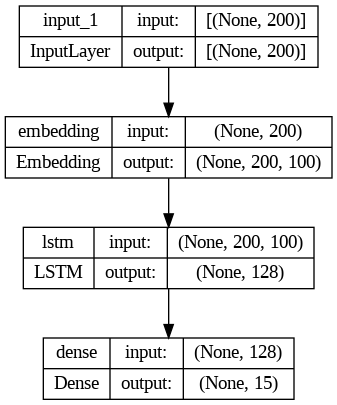

In [26]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [27]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam', 
  metrics=['acc']
)

In [28]:
#stops training once validation loss has stopped improving
early_stopping = EarlyStopping(
    monitor="val_loss",
    min_delta = 0.001,
    patience = 50,
    restore_best_weights = True
)

In [29]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
26/26 [==============================] - 11s 76ms/step - loss: 0.4488 - acc: 0.2109 - val_loss: 0.2727 - val_acc: 0.2921
Epoch 2/50
26/26 [==============================] - 1s 30ms/step - loss: 0.2710 - acc: 0.2424 - val_loss: 0.2680 - val_acc: 0.2921
Epoch 3/50
26/26 [==============================] - 1s 30ms/step - loss: 0.2695 - acc: 0.2503 - val_loss: 0.2676 - val_acc: 0.2921
Epoch 4/50
26/26 [==============================] - 1s 34ms/step - loss: 0.2690 - acc: 0.2479 - val_loss: 0.2681 - val_acc: 0.1964
Epoch 5/50
26/26 [==============================] - 1s 29ms/step - loss: 0.2691 - acc: 0.2027 - val_loss: 0.2678 - val_acc: 0.1964
Epoch 6/50
26/26 [==============================] - 1s 27ms/step - loss: 0.2691 - acc: 0.2184 - val_loss: 0.2676 - val_acc: 0.1964
Epoch 9/50
26/26 [==============================] - 1s 20ms/step - loss: 0.2691 - acc: 0.2615 - val_loss: 0.2680 - val_acc: 0.1952
Epoch 10/50
26/26 [==============================] - 0s 18ms/step - loss: 0.2692 -

In [30]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

33/33 [==============================] - 0s 5ms/step - loss: 0.2714 - acc: 0.1940
Test Score: 0.2713543474674225
Test Accuracy: 0.1939864158630371


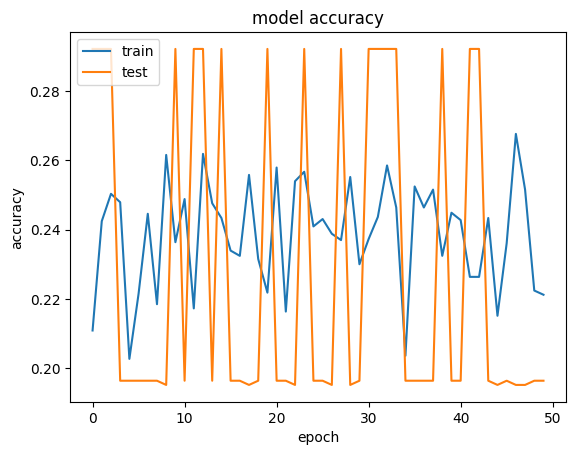

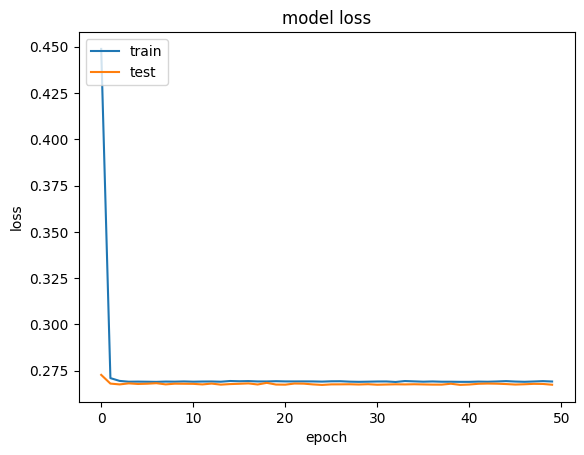

In [31]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [33]:
model.save(config.MODEL_DIR / "LSTM_topic_modeling")